<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-выполнение-проекта-и-перечень-основных-задач" data-toc-modified-id="План-выполнение-проекта-и-перечень-основных-задач-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План выполнение проекта и перечень основных задач</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Файл-с-данными-и-общая-информация-о-датасете" data-toc-modified-id="Файл-с-данными-и-общая-информация-о-датасете-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Файл с данными и общая информация о датасете</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-даных" data-toc-modified-id="Подготовка-даных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовка даных</a></span></li><li><span><a href="#Обучение-и-выбор-моделей" data-toc-modified-id="Обучение-и-выбор-моделей-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Обучение и выбор моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регресия" data-toc-modified-id="Линейная-регресия-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Линейная регресия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Выбор-оптимальной-модели" data-toc-modified-id="Выбор-оптимальной-модели-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Выбор оптимальной модели</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Описание проекта

Компания такси собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания. Качество предсказание модели будет оцениваться метрикой RMSE (на тестовой выборке не больше 48).

## Описание данных

Данные лежат в файле csv. 

Количество заказов находится в столбце num_orders (от англ. number of orders, «число заказов»).

## План выполнение проекта и перечень основных задач

Перечень задач:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. 
4. Сделать тестовую выборку размером 10% от исходных данных.
5. Проверить данные на тестовой выборке и сделать выводы.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

## Загрузка и подготовка данных

### Файл с данными и общая информация о датасете

Загрузим требуемые для работы библиотеки, прочитаем csv-файл с данными и посмотрим общую информацию о датасете.

In [1]:
# импортируем необходимые в работе библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy import stats as st
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

from sklearn.metrics import mean_squared_error, make_scorer

import random
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [2]:
# выделение в переменную random state
RANDOM_STATE=12345

In [3]:
# чтение файла, сохранение данных в переменной data
# преобразуем столбец с датой в нужный формат и установим индекс таблицы равным столбцу Datetime

data = pd.read_csv('/datasets/taxi.csv', index_col=['datetime'], parse_dates=['datetime'])

In [4]:
# просмотр первых 5 строк с данными датасета
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [5]:
#вывод общей информации о датасете
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


(26496, 1)

In [6]:
# сортировака индексов и проверка на хронологическую последовательность даты и времени
data.sort_index(inplace=True)
print(data.index.is_monotonic)
print(data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


**Промежуточный вывод о датасете:**
В представленном датасете содержатся данные о количестве заказов такси по датам в период с 01.03.2018 по 31.08.2018. Всего 26 496 строк и 2 столбца, один из которых дата.

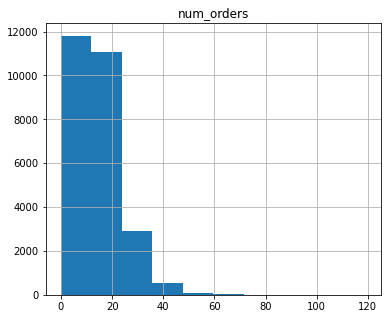

In [7]:
#построение общей гистограммы для всех столбцов таблицы
data.hist(figsize=(6, 5));

**Промежуточный вывод о распределении данных:**
Проанализируем гистограмму распределения данных. Распределение количества заказов такси можно отнести к нормальному, так как есть ограничение - цены не могут быть нулевыми и начинаются с опреденной величины.

### Предобработка данных

Проверим потребуется какая-то преобработка данных или нет.

In [8]:
# проверка наличия пропущенных значений
data.isna().sum()

num_orders    0
dtype: int64

In [9]:
# вывод подробной информации о значениях столбца num_orders
data.describe(percentiles=[0.01, 0.02, 0.03, 0.05, 1/4, 1/2, 0.95, 0.99])

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
1%,0.000000
2%,0.000000
3%,1.000000
5%,2.000000
25%,8.000000
50%,13.000000


In [10]:
# вывод инфорации о минимальной дате и времени
data.index.min()

Timestamp('2018-03-01 00:00:00')

In [11]:
# вывод инфорации о максимальной дате и времени
data.index.max()

Timestamp('2018-08-31 23:50:00')

Пропущенных значений не выявлено. Данные идут последовательно по дате и времени (is_monotonic = True). В датасете представлены данные о количестве заказов такси за период с 01.03.2018 по 31.08.2018, то есть за 6 месяцев.

Предобработка не потребуется.

### Ресемплирование данных

По условиям проекта нам необходимо сделать ресемплирование (изменение интервала со значениями ряда) данных по одному часу. Агрегированным значением ряда будет сумма заказов (среднее, мин и макс не подходят).

In [12]:
# ресемплирование данных по одному часу
data = data.resample('1H').sum()

## Анализ

Посмотрим более подробно на данные и проведем небольшой исследовательский анализ данных на графиках.

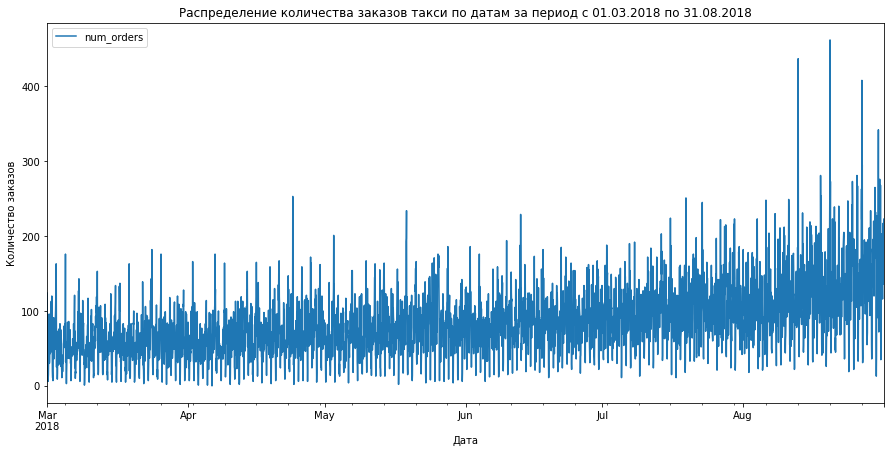

In [13]:
# построение графика временного ряда
data.plot(
    figsize=(15, 7), 
    title = 'Распределение количества заказов такси по датам за период с 01.03.2018 по 31.08.2018', 
    xlabel = 'Дата', 
    ylabel = 'Количество заказов'
);

Из графика видно, что данные плавный тренд на возростание. Но пока сложно сделать какие-либо выводы. Рассмотрим данные более подробно в рамках суток по часам.

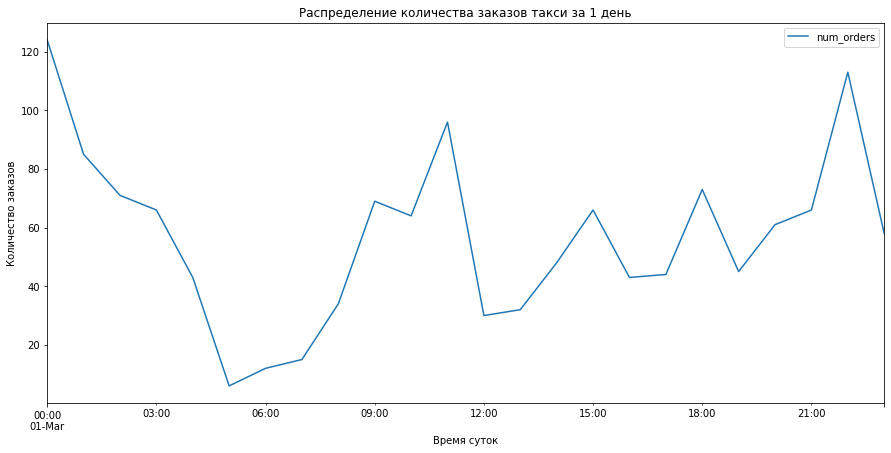

In [14]:
# построение графика временного ряда в рамках одного дня
data.head(24).plot(
    figsize=(15, 7), 
    title = 'Распределение количества заказов такси за 1 день', 
    xlabel = 'Время суток', 
    ylabel = 'Количество заказов'
);

Исходя из анализа одного дня прослеживаются пики по востребованности такси. Так количество заказов возрастает утром в период с 7:00 по 11:00 и вечером с 21:00 до 22:00. Вероятно утром есть повышенный спрос, так как люди всеми способами добираюся на работу в офис. Вечером вероятно возрастает спрос в позднее время, чтобы не возвращаться общественным транспортом.

Чтобы лучше понимать временной ряд, разобьем ряд на тренд, сезонность и остаток.

•	decomposed.trend — тренд;

•	decomposed.seasonal — сезонная составляющая;

•	decomposed.resid — остаток декомпозиции.

In [15]:
# применение функции seasonal_decompose() для выделения трех составляющих: тренда, сезонности и остатка 
decomposed = seasonal_decompose(data)

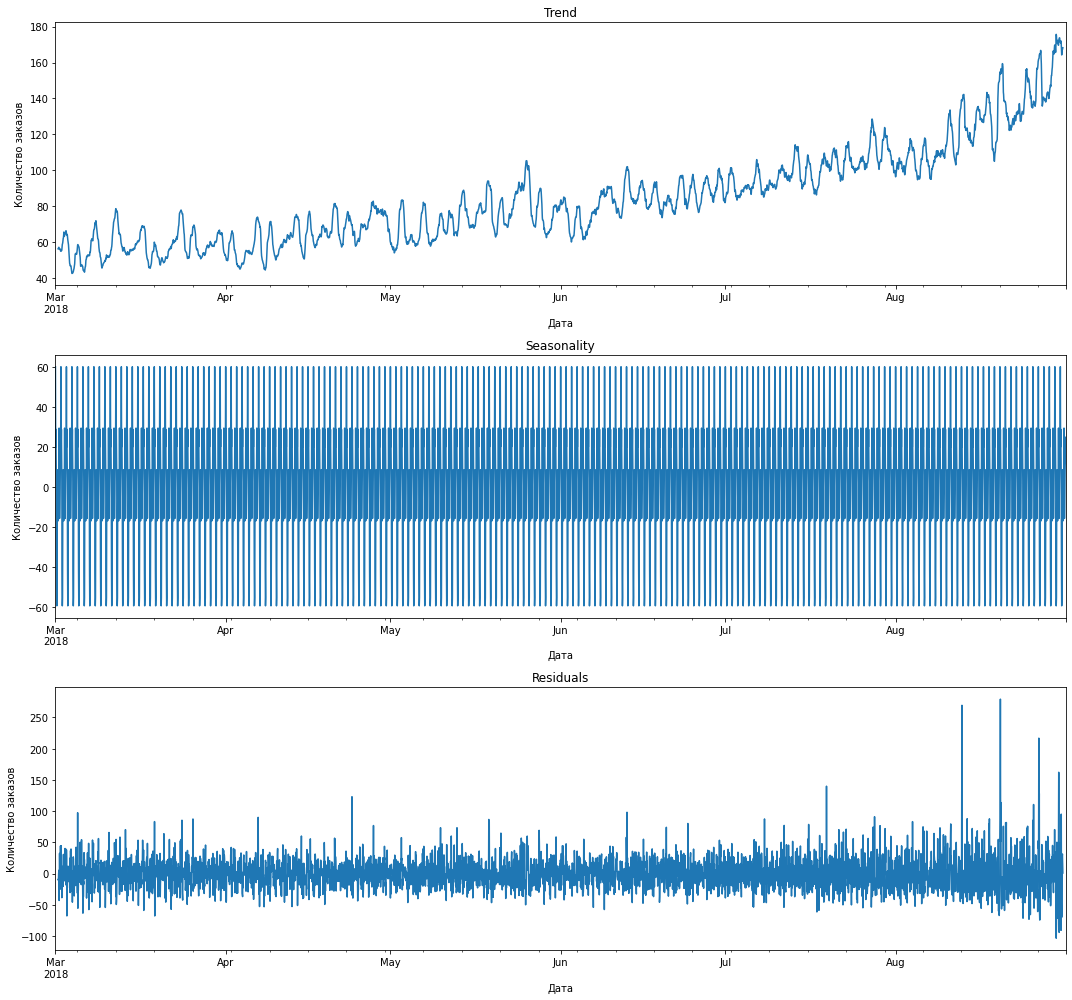

In [16]:
# построение графиков тренда, сезонности и остатка за весь период данных

plt.figure(figsize=(15, 14))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca() (англ. get current axis, получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.tight_layout()


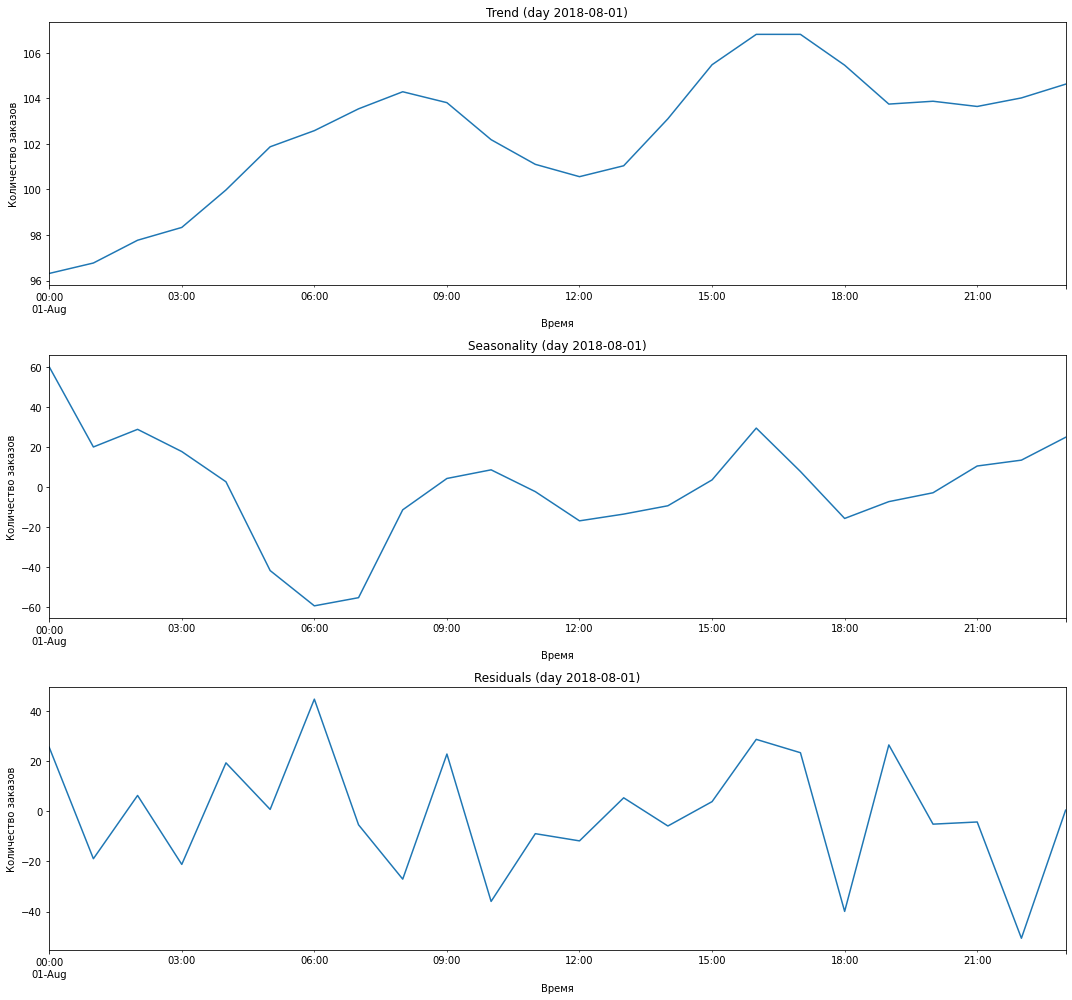

In [17]:
# построение графиков тренда, сезонности и остатка за день (срез 2018-08-01)

plt.figure(figsize=(15, 14))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca() (англ. get current axis, получить текущие оси)
decomposed.trend['2018-08-01':'2018-08-01'].plot(ax=plt.gca())
plt.title('Trend (day 2018-08-01)')
plt.xlabel('Время')
plt.ylabel('Количество заказов')
plt.subplot(312)
decomposed.seasonal['2018-08-01':'2018-08-01'].plot(ax=plt.gca())
plt.title('Seasonality (day 2018-08-01)')
plt.xlabel('Время')
plt.ylabel('Количество заказов')
plt.subplot(313)
decomposed.resid['2018-08-01':'2018-08-01'].plot(ax=plt.gca())
plt.title('Residuals (day 2018-08-01)')
plt.xlabel('Время')
plt.ylabel('Количество заказов')
plt.tight_layout()


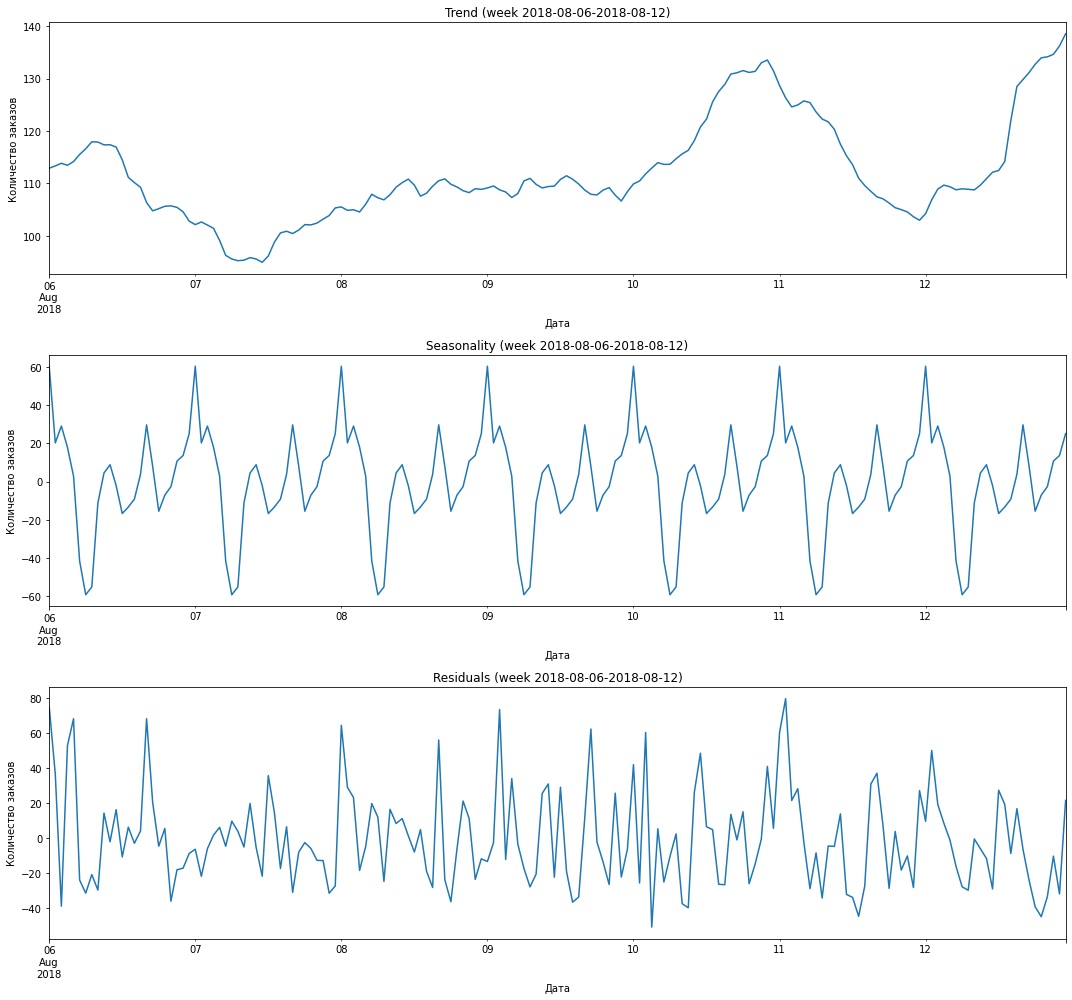

In [18]:
# построение графиков тренда, сезонности и остатка за неделю (срез 2018-08-06 - 2018-08-12, пн - вс)

plt.figure(figsize=(15, 14))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca() (англ. get current axis, получить текущие оси)
decomposed.trend['2018-08-06':'2018-08-12'].plot(ax=plt.gca())
plt.title('Trend (week 2018-08-06-2018-08-12)')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.subplot(312)
decomposed.seasonal['2018-08-06':'2018-08-12'].plot(ax=plt.gca())
plt.title('Seasonality (week 2018-08-06-2018-08-12)')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.subplot(313)
decomposed.resid['2018-08-06':'2018-08-12'].plot(ax=plt.gca())
plt.title('Residuals (week 2018-08-06-2018-08-12)')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.tight_layout()

Разделив временной ряд на тренд и сезонность можно сделать вывод, что количество заказов такси:

 - различается по дням недели: самое большое количество заказов такси в субботу, также наблюдается повышенное количество заказов в понедельник,
 - различается по часам в рамках дня: количество заказов возрастает утром в период с 7:00 по 11:00, днем с 15:00 до 17:00 и вечером с 21:00 до 22:00. 

In [19]:
# расчет скользящего среднего и скользящего стандартного отклонения
data['rolling_mean'] = data['num_orders'].rolling(5).mean() 
data['std'] = data['num_orders'].rolling(15).std()

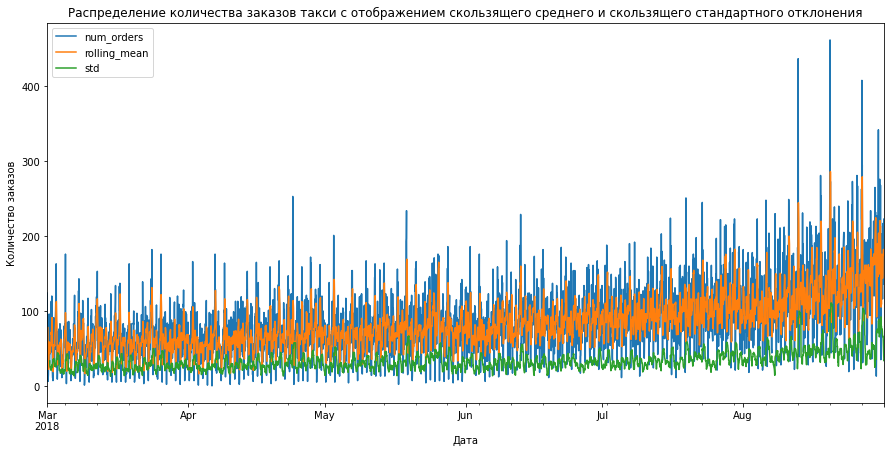

In [20]:
# построение графика временного ряда с отображением скользящего среднего и скользящего стандартного отклонения
data.plot(
    figsize=(15, 7), 
    title = 'Распределение количества заказов такси с отображением скользящего среднего и скользящего стандартного отклонения', 
    xlabel = 'Дата', 
    ylabel = 'Количество заказов'
);

In [21]:
# удаление признаков, неучаствующих в моделировании
del data['rolling_mean'], data['std']

In [22]:
# проверка
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Прогнозировать данные помогают стационарные ряды. В статистике временной ряд описывается стохастическим процессом. Это случайная величина, у которой со временем меняется её распределение. У этой величины есть среднее и дисперсия, которые тоже меняются. Стохастический процесс является стационарным, если его распределение со временем не меняется. Например, к такому процессу относятся периодические колебания значений. Узнать распределение временного ряда нельзя. Поэтому стационарные временные ряды — это ряды, у которых среднее и стандартное отклонение не меняются. Нестационарные ряды прогнозировать сложнее: их свойства меняются слишком быстро.

В строгом смысле наш ряд не является стационарным, потому что имеет не только тренд, но еще и с августа - ускорение (квадратичный тренд). Однако в широком смысле ряд стационарный, когда его можно предсказывать. То есть, когда он все-таки не является случайным блужданием и его среднее значение плавно растёт.

In [23]:
# код для проверки стационарности ряда (тест Дики-Фуллера)
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный.')

if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')

Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный.
Наш ряд стационарный


## Обучение

### Подготовка даных

Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения временного ряда.

Создадим признаки: день, день недели и час. Данные у нас за 6 месяцев 2018 года, поэтому переменные год и месяц создавать не требуется (недостаточно данных, не полный год).

In [24]:
# функция для создания признаков
# календарные признаки (день, день недели и час)
# «отстающие значения» (max_lag)
# скользящее среднее (rolling_mean_size)

def make_features(data, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return data

Подберем значение параметров max_lag и rolling_mean_size аналитически, а также с использованием цикла.

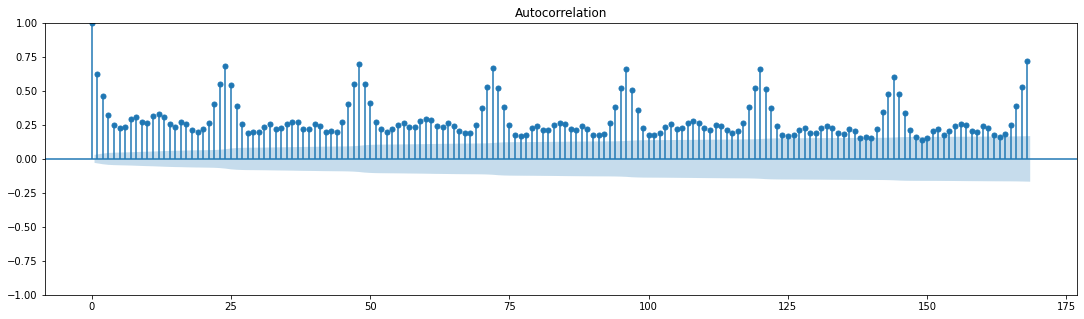

In [25]:
# подбор max_lag аналитически
from statsmodels.graphics import tsaplots


fig = tsaplots.plot_acf(data['num_orders'],lags= 24*7)
fig.set_size_inches(18.5, 5)
plt.show() 

На графике видно, что важные фичи у нас идут каждые 24 часа (тот же час соседнего дня, причем час неделю назад весьма важен). 
На автокорреляции видно, что 24 и 48 часов - пики и вокруг них по пару часов также важны.

In [26]:
# перебор параметров с помощью цикла
features_selection = []

for max_lag in range(10, 60, 10):
    for rolling_mean_size in (6, 19, 6):
        features = make_features(data, max_lag, rolling_mean_size)
        train, test = train_test_split(features, shuffle=False, test_size=0.1)
            
        train = train.dropna()
            
        train_target = train['num_orders']
        train_features = train.drop(columns=['num_orders'])
        test_target = test['num_orders']
        test_features = test.drop(columns=['num_orders'])
            
        model = LinearRegression()
        model.fit(train_features.dropna(), train_target.dropna())
        test_predicted = model.predict(test_features)
            
        best_result = dict()
        best_result['max_lag'] = max_lag
        best_result['rolling_mean_size'] = rolling_mean_size
        best_result['rmse'] = mean_squared_error(test_predicted, test_target)**0.5
            
        features_selection.append(best_result)

In [27]:
# расчет оптимальных параметров
min_rmse_row = dict();
min_rmse_row['rmse'] = 100;

for row in features_selection:
    if (row['rmse'] < min_rmse_row['rmse']):
        min_row_rmse = row

min_row_rmse

{'max_lag': 50, 'rolling_mean_size': 6, 'rmse': 41.8637704770447}

С помощью цикла значения оптимальных параметров max_lag и rolling_mean_size оказались схожи: max_lag = 50 (аналитически 48 и 24 часа), rolling_mean_size = 6.

In [28]:
# применение функции по созданию признаков make_features с оптимальными параметрами
data = make_features(data, 24, 6)

Раздедим данные на обучающую и тестовую выборку, размер тестовой выборки 10% (как это требуется по проекту).

Функция train_test_split() по умолчанию перемешивает данные. Поэтому укажем аргумент shuffle равным False, чтобы разделить данные корректно.

Далее выделим целевой признак. Нам необходимо спрогнозировать количество заказов на слеующий час, а количество заказов находится в столбце num_orders.


In [29]:
# разделение данных на обучающую и тестовую выборки
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

In [30]:
# выделение целевой переменной и признаков
train_features = train.drop(['num_orders'], axis=1)
train_target = train['num_orders']
test_features = test.drop(['num_orders'], axis=1)
test_target = test['num_orders']

In [31]:
# проверка размера обучающей выборки
train_features.shape
train_target.shape

(3924,)

In [32]:
# проверка размера тестовой выборки
test_features.shape
test_target.shape

(442,)

### Обучение и выбор моделей

По условиям проекта нам необходимо спрогнозировать количество заказов такси на следующий час. Поэтому будет решаться задача регрессии. Для анализа и выбора оптимальной модели будем использовать три модели регресии (Линейная регрессия, Случайный лес и CatBoost) с подбором гиперпараметров и оценкой результата через метод GridSearchCV.

#### Линейная регресия

In [33]:
# параметры для GridSearchCV для модели линейной регрессии
parameters_lr = {'normalize': [True, False]}

In [34]:
%%time

# обучение модели линейной регресии

model_lr = LinearRegression()
grid_lr = GridSearchCV(model_lr, parameters_lr, cv=TimeSeriesSplit(), scoring='neg_root_mean_squared_error')
grid_lr.fit(train_features, train_target)
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'normalize': False}
-24.80586160926562
CPU times: user 663 ms, sys: 1.59 s, total: 2.25 s
Wall time: 2.18 s


In [35]:
# вывод результатов
results = pd.DataFrame(grid_lr.cv_results_)
display(results)
display(results[results['rank_test_score'] == 1])
fit_time_lr = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_lr = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time_lr: {fit_time_lr}, predict_time_lr: {predict_time_lr}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.105239,0.061442,0.169429,0.038848,True,{'normalize': True},-21.904364,-22.357828,-23.490192,-25.076314,-31.201681,-24.806076,3.380005,2
1,0.134347,0.043995,0.005414,0.003127,False,{'normalize': False},-21.897551,-22.359030,-23.498378,-25.074332,-31.200017,-24.805862,3.379706,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.134347,0.043995,0.005414,0.003127,False,{'normalize': False},-21.897551,-22.35903,-23.498378,-25.074332,-31.200017,-24.805862,3.379706,1


Fit_time_lr: 0.13434720039367676, predict_time_lr: 0.005414199829101562


#### Случайный лес

In [36]:
# параметры для GridSearchCV для модели случайного леса
parameters_rfr = {'max_depth':range(2, 10, 2), 'n_estimators':[20, 100, 20]}

In [37]:
%%time
# расчет с помощью модели RandomForestRegressor
# обучение модели

model_rfr = RandomForestRegressor(random_state=12345)
grid_rfr = GridSearchCV(model_rfr, parameters_rfr, cv=TimeSeriesSplit(), scoring='neg_root_mean_squared_error')
grid_rfr.fit(train_features, train_target)
print(grid_rfr.best_params_)
print(grid_rfr.best_score_)

{'max_depth': 8, 'n_estimators': 100}
-24.7033679711827
CPU times: user 54.8 s, sys: 392 ms, total: 55.2 s
Wall time: 55.2 s


In [38]:
# вывод результатов
results = pd.DataFrame(grid_rfr.cv_results_)
display(results)
display(results[results['rank_test_score'] == 1])
fit_time_rfr = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_rfr = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time: {fit_time_rfr}, predict_time: {predict_time_rfr}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152758,0.054404,0.004762,0.000757,2,20,"{'max_depth': 2, 'n_estimators': 20}",-24.964609,-27.264121,-28.064857,-29.162115,-41.211221,-30.133385,5.707706,11
1,0.756205,0.307819,0.010818,0.000855,2,100,"{'max_depth': 2, 'n_estimators': 100}",-24.746684,-27.346482,-27.788354,-29.169965,-40.827756,-29.975849,5.611706,10
2,0.156357,0.071780,0.004507,0.000576,2,20,"{'max_depth': 2, 'n_estimators': 20}",-24.964609,-27.264121,-28.064857,-29.162115,-41.211221,-30.133385,5.707706,11
3,0.289899,0.115349,0.004859,0.000234,4,20,"{'max_depth': 4, 'n_estimators': 20}",-23.091430,-23.573047,-24.648975,-25.593557,-36.315704,-26.644543,4.912778,8
4,1.441570,0.628315,0.012753,0.000765,4,100,"{'max_depth': 4, 'n_estimators': 100}",-23.072508,-23.473283,-24.288603,-25.418717,-35.837759,-26.418174,4.777623,7
5,0.285912,0.125227,0.004874,0.000487,4,20,"{'max_depth': 4, 'n_estimators': 20}",-23.091430,-23.573047,-24.648975,-25.593557,-36.315704,-26.644543,4.912778,8
6,0.430942,0.197448,0.005597,0.001109,6,20,"{'max_depth': 6, 'n_estimators': 20}",-22.505513,-22.533636,-24.122823,-24.668441,-33.829301,-25.531943,4.236190,5
7,2.092511,0.938199,0.013320,0.001274,6,100,"{'max_depth': 6, 'n_estimators': 100}",-22.398702,-22.511507,-23.511185,-24.286071,-33.172921,-25.176077,4.057764,4
8,0.420511,0.183010,0.005321,0.000273,6,20,"{'max_depth': 6, 'n_estimators': 20}",-22.505513,-22.533636,-24.122823,-24.668441,-33.829301,-25.531943,4.236190,5
9,0.565309,0.249354,0.006136,0.000722,8,20,"{'max_depth': 8, 'n_estimators': 20}",-22.327936,-22.368598,-23.841643,-24.325114,-33.006385,-25.173935,3.995307,2


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,2.722871,1.226956,0.014588,0.000298,8,100,"{'max_depth': 8, 'n_estimators': 100}",-22.053894,-22.06232,-23.21313,-23.954769,-32.232726,-24.703368,3.833205,1


Fit_time: 2.7228710651397705, predict_time: 0.014588403701782226


#### CatBoost

In [39]:
# параметры для GridSearchCV для модели CatBoost
parameters_cbr = {'learning_rate': np.logspace(-3, 0, 5),'iterations': range(20, 60, 20),'depth': range(5,10,2)}

In [40]:
%%time
# обучение модели CatBoostRegressor

model_cbr = CatBoostRegressor(loss_function='RMSE', random_seed=RANDOM_STATE)
grid_cbr = GridSearchCV(model_cbr, parameters_cbr, cv=TimeSeriesSplit(), scoring='neg_root_mean_squared_error')
grid_cbr.fit(train_features, train_target)
print(grid_cbr.best_params_)
print(grid_cbr.best_score_)

0:	learn: 29.2487210	total: 52ms	remaining: 989ms
1:	learn: 29.2353369	total: 55.9ms	remaining: 503ms
2:	learn: 29.2214905	total: 59.6ms	remaining: 338ms
3:	learn: 29.2081148	total: 63.5ms	remaining: 254ms
4:	learn: 29.1942418	total: 67.5ms	remaining: 203ms
5:	learn: 29.1807837	total: 71.1ms	remaining: 166ms
6:	learn: 29.1682708	total: 74.9ms	remaining: 139ms
7:	learn: 29.1558493	total: 78.7ms	remaining: 118ms
8:	learn: 29.1427682	total: 82.4ms	remaining: 101ms
9:	learn: 29.1309468	total: 85.9ms	remaining: 85.9ms
10:	learn: 29.1188989	total: 90ms	remaining: 73.6ms
11:	learn: 29.1067469	total: 93.7ms	remaining: 62.5ms
12:	learn: 29.0944752	total: 98.1ms	remaining: 52.8ms
13:	learn: 29.0814972	total: 102ms	remaining: 43.8ms
14:	learn: 29.0689625	total: 106ms	remaining: 35.3ms
15:	learn: 29.0564680	total: 110ms	remaining: 27.5ms
16:	learn: 29.0456293	total: 114ms	remaining: 20.1ms
17:	learn: 29.0323429	total: 117ms	remaining: 13ms
18:	learn: 29.0195867	total: 121ms	remaining: 6.38ms
19:	l

In [41]:
# вывод результатов
results = pd.DataFrame(grid_cbr.cv_results_)
display(results)
display(results[results['rank_test_score'] == 1])
fit_time_cbr = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_cbr = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time: {fit_time_cbr}, predict_time: {predict_time_cbr}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.935884,0.049811,0.004928,0.001418,5,20,0.001,"{'depth': 5, 'iterations': 20, 'learning_rate'...",-31.361263,-35.489199,-37.849295,-41.112924,-55.614225,-40.285381,8.297422,28
1,0.917174,0.080430,0.004553,0.001236,5,20,0.005623,"{'depth': 5, 'iterations': 20, 'learning_rate'...",-30.521665,-34.473674,-36.485301,-39.520400,-53.846395,-38.969487,7.992185,22
2,0.983610,0.088445,0.004540,0.000706,5,20,0.031623,"{'depth': 5, 'iterations': 20, 'learning_rate'...",-26.988363,-29.914070,-30.958595,-32.804655,-46.226583,-33.378453,6.694694,16
3,0.936658,0.063015,0.004163,0.000700,5,20,0.177828,"{'depth': 5, 'iterations': 20, 'learning_rate'...",-22.304802,-22.989225,-23.728296,-24.663108,-34.497534,-25.636593,4.499221,5
4,0.906955,0.058606,0.003857,0.000136,5,20,1.0,"{'depth': 5, 'iterations': 20, 'learning_rate'...",-26.360341,-26.501953,-26.646363,-27.365747,-36.343067,-28.643494,3.865322,8
5,1.133870,0.131412,0.004015,0.000212,5,40,0.001,"{'depth': 5, 'iterations': 40, 'learning_rate'...",-31.164806,-35.260930,-37.554705,-40.738551,-55.207858,-39.985370,8.225840,25
6,1.050285,0.025874,0.003921,0.000220,5,40,0.005623,"{'depth': 5, 'iterations': 40, 'learning_rate'...",-29.567891,-33.309475,-35.071694,-37.746576,-51.837289,-37.506585,7.641910,19
7,0.959698,0.073134,0.003688,0.000084,5,40,0.031623,"{'depth': 5, 'iterations': 40, 'learning_rate'...",-24.477975,-26.585679,-27.276183,-28.394002,-40.987833,-29.544334,5.862475,13
8,1.026495,0.043187,0.004044,0.000271,5,40,0.177828,"{'depth': 5, 'iterations': 40, 'learning_rate'...",-21.491841,-22.169126,-22.974145,-24.008498,-32.359159,-24.600554,3.969071,2
9,1.026459,0.096020,0.004274,0.000846,5,40,1.0,"{'depth': 5, 'iterations': 40, 'learning_rate'...",-26.512246,-27.320110,-27.192783,-29.425368,-37.047230,-29.499547,3.897899,12


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,1.691342,0.16758,0.004185,0.000455,7,40,0.177828,"{'depth': 7, 'iterations': 40, 'learning_rate'...",-21.695791,-22.016422,-22.800862,-23.649892,-32.415459,-24.515685,4.007362,1


Fit_time: 1.6913419723510743, predict_time: 0.0041847705841064455


#### Выбор оптимальной модели

In [42]:
# сводная таблица результирующих значений для выбора оптимальной модели

results = pd.DataFrame()
results['model_type'] = pd.Series(['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor'])
results['fit_time, sec'] = pd.Series([fit_time_lr,
    fit_time_rfr, fit_time_cbr])
results['predict_time, sec'] = pd.Series([predict_time_lr,
    predict_time_rfr, predict_time_cbr])

results['rmse_evaluation'] = pd.Series([
    grid_lr.best_score_ * -1,
    grid_rfr.best_score_ * -1, 
    grid_cbr.best_score_ * -1])
    
results

,model_type,"fit_time, sec","predict_time, sec",rmse_evaluation
0,LinearRegression,0.134347,0.005414,24.805862
1,RandomForestRegressor,2.722871,0.014588,24.703368
2,CatBoostRegressor,1.691342,0.004185,24.515685


Наиболее оптимальной моделью по значению показателя RMSE является модель CatBoostRegressor (наименьшее значение rmse).

## Тестирование

In [44]:
%%time

# проверка выбранной оптимальной модели на тестовых данных

model_cbr = CatBoostRegressor(loss_function='RMSE', random_seed=RANDOM_STATE)
model_cbr.fit(train_features, train_target)
predictions_test = model_cbr.predict(test_features)
rmse_cbr = mean_squared_error(test_target, predictions_test)**0.5 
print('CatBoostRegressor_Test_RMSE:', rmse_cbr)

Learning rate set to 0.050815
0:	learn: 37.6632177	total: 16.3ms	remaining: 16.3s
1:	learn: 36.7041647	total: 29.1ms	remaining: 14.5s
2:	learn: 35.8814598	total: 41.7ms	remaining: 13.9s
3:	learn: 35.0393454	total: 54.6ms	remaining: 13.6s
4:	learn: 34.2813282	total: 67.4ms	remaining: 13.4s
5:	learn: 33.5383901	total: 79.9ms	remaining: 13.2s
6:	learn: 32.8066343	total: 94.1ms	remaining: 13.4s
7:	learn: 32.2179901	total: 107ms	remaining: 13.2s
8:	learn: 31.5859842	total: 119ms	remaining: 13.1s
9:	learn: 31.0805169	total: 133ms	remaining: 13.1s
10:	learn: 30.5917275	total: 147ms	remaining: 13.2s
11:	learn: 30.1055455	total: 160ms	remaining: 13.2s
12:	learn: 29.6562693	total: 173ms	remaining: 13.1s
13:	learn: 29.2093916	total: 186ms	remaining: 13.1s
14:	learn: 28.7697011	total: 198ms	remaining: 13s
15:	learn: 28.3564785	total: 212ms	remaining: 13s
16:	learn: 27.9943108	total: 228ms	remaining: 13.2s
17:	learn: 27.6736623	total: 241ms	remaining: 13.1s
18:	learn: 27.3771135	total: 253ms	remain

Значение показателя rmse на тестовых данных плучилось 39.12. Это удовлетворяет требованиям проекта.

## Общий вывод

По условиям проекта необходимо было спрогнозировать количество заказов такси на следующий час с целью привлечения больше водителей в период пиковой нагрузки. 

Для анализа использовались исторические данные о заказах такси в аэропортах. Данные состоят из двух столбцов даты, времени и количества заказов.

Был проведен небольшой исследовательский анализ. Временной ряд является стационарным, потому что его среднее значение плавно растёт. Разделив временной ряд на тренд и сезонность можно сделать вывод, что количество заказов такси:

 - различается по дням недели: самое большое количество заказов такси в субботу, также наблюдается повышенное количество заказов в понедельник,
 - различается по часам в рамках дня: количество заказов возрастает утром в период с 7:00 по 11:00, днем с 15:00 до 17:00 и вечером с 21:00 до 22:00.

Для решения задачи были проанализированы три модели: две простые модели (модель Линейной регресии и Случайный лес) и одна модель градиентного бустинга (CatBoost). Качество предсказание модели оценивается метрикой RMSE (на тестовой выборке должно быть не больше 48).

Оптимальной для задачи заказчика выбрана модель CatBoost.